# Filter Values
Pull aboveground live carbon density from Planet's Forest Carbon Diligence dataset and filter the dataset to remove pixels where there is no biomass (e.g. equal to zero).

### Import required packages.

In [5]:
import snowflake.connector
import os
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# Load environment variables.
load_dotenv()

True

### Connect to Snowflake and pull the data of interest.
The SQL query below demonstrates how to access variables from the Planet Forest Carbon Diligence dataset and filter the dataset to remove zeros. The code chunk below defines two separate SQL queries, one called sql_query_filtered where all rows with aboveground_live_carbon_density equal to zero are removed, and another called sql_query_unfiltered, with all original values kept in the dataset. The unfiltered dataset is only used for demonstration purposes to highlight the values that have been filtered out.

**SQL Query Breakdown (Filtered Dataset)**

We begin by selecting the variables of interest from the Planet Forest Carbon dataset. In addition to the year, y (latitude), and x (longitude) values, we pull the raw aboveground_carbon_density data, and rename this variable 'planet_acd' using the SQL clause 'AS'. 
```SQL
    SELECT
        year,
        x,
        y,
        aboveground_live_carbon_density AS planet_acd,
```

Next, we use the SQL clause 'FROM' to indicate which dataset the variables should be pulled from.
```SQL
    FROM
        planet.raw_forest_carbon_diligence_30_m
```

Finally, we select only the rows of the dataset where the year is equal to 2020 using the SQL clause 'WHERE', and where the aboveground live carbon density is not equal to zero. 
```SQL
    WHERE
        year = 2020
        AND aboveground_live_carbon_density != 0
```

In [7]:
# Define the SQL query to get Planet data for 2020 and filter to remove zeros.
sql_query_filtered = """
    SELECT 
        year,
        x,
        y,
        aboveground_live_carbon_density AS planet_acd
    FROM 
        planet.raw_forest_carbon_diligence_30_m
    WHERE
        year = 2020
        AND aboveground_live_carbon_density != 0
    """
# For comparison, query the same data without removing zeros.
sql_query_unfiltered = """
    SELECT 
        year,
        x,
        y,
        aboveground_live_carbon_density AS planet_acd
    FROM 
        planet.raw_forest_carbon_diligence_30_m
    WHERE
        year = 2020
    """

# Connect to database and execute query.
with snowflake.connector.connect(
        account=os.getenv('DB_ACCOUNT'),
        warehouse=os.getenv('DB_WAREHOUSE'),
        database=os.getenv('DB_DATABASE'), 
        user=os.getenv('DB_USERNAME'),
        password=os.getenv('DB_PASSWORD')
) as conn:
    # Execute the filtered sql query and store in pandas dataframe.
    cur = conn.cursor().execute(sql_query_filtered)
    df_filtered = cur.fetch_pandas_all()

    # Execute the unfiltered sql query and store in pandas dataframe.
    cur = conn.cursor().execute(sql_query_unfiltered)
    df_unfiltered = cur.fetch_pandas_all()


### Plot results. 
The following plots demonstrate the removal of zero values from the Planet dataset. Note that the figure on the right (the unfiltered dataset) contains a straight line of points where aboveground carbon density is equal to zero. The figure on the left (the filtered dataset) does not contain these zero points, indicating that the filtering has worked as expected.

Text(0.5, 1.0, 'PLANET ACD (unfiltered - raw data)')

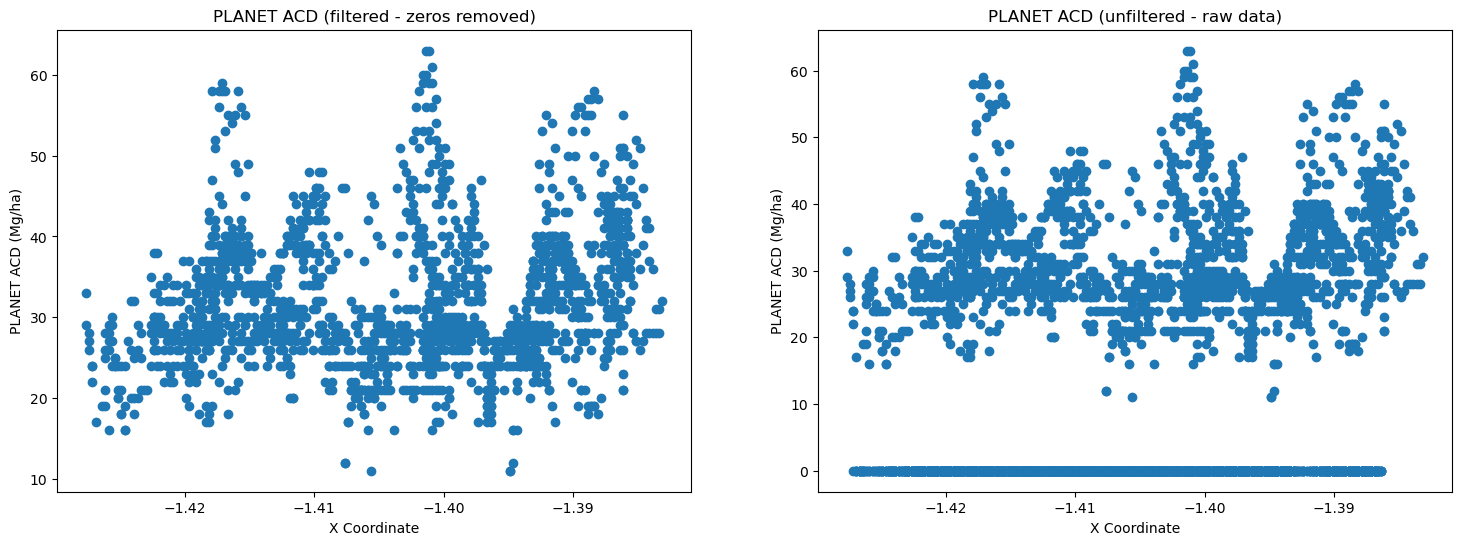

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].scatter(df_filtered['X'], df_filtered['PLANET_ACD'])
axes[0].set_xlabel('X Coordinate')
axes[0].set_ylabel('PLANET ACD (Mg/ha)')
axes[0].set_title('PLANET ACD (filtered - zeros removed)')


axes[1].scatter(df_unfiltered['X'], df_unfiltered['PLANET_ACD'])
axes[1].set_xlabel('X Coordinate')
axes[1].set_ylabel('PLANET ACD (Mg/ha)')
axes[1].set_title('PLANET ACD (unfiltered - raw data)')